In [2]:
import sys
import os

# Add project root to sys.path
sys.path.append(os.path.abspath(".."))

# Visualization of Activations

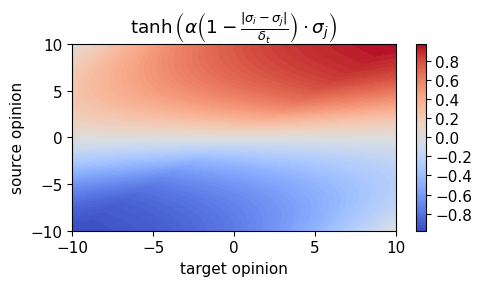

In [14]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 11})  # or any value you like

# Define parameters
alpha = 0.2
delta_t = 20

# Define the function
def influence_function(sigma_i, sigma_j, alpha=alpha, delta_t=delta_t):
    h = alpha * (1 - np.abs(sigma_i - sigma_j) / delta_t)
    # h= alpha  
    return np.tanh(h * sigma_j)

# Create a grid of sigma_i and sigma_j values
sigma_range = np.linspace(-10, 10, 400)
sigma_i, sigma_j = np.meshgrid(sigma_range, sigma_range)

# Compute the function values
values = influence_function(sigma_i, sigma_j)

# Plotting
plt.figure(figsize=(5, 3))
cmap = plt.get_cmap('coolwarm')  # blue-white-red colormap
plt.contourf(sigma_i, sigma_j, values, levels=100, cmap=cmap)
plt.colorbar()
plt.xlabel('target opinion')
plt.ylabel('source opinion')
plt.title(r'$\tanh\left(\alpha\left(1 - \frac{|\sigma_i - \sigma_j|}{\delta_t}\right)\cdot \sigma_j\right)$')
plt.grid(False)
plt.tight_layout()
plt.show()


# Visualizing Network Nonlinear Model

In [13]:
# from evaluation import *
# from visualization import *
from env import NLOpinionDynamics

env = NLOpinionDynamics(n = 150, alpha=0.2, beta=1, gamma = 0.6, average_degree=6, n_edge_updates_per_step = 4)

state = env.reset()
recorded_graphs = [(state['graph'], state['sigma'])]
opinions = [state['sigma'].copy()]  # Initialize with the initial opinions
for time_step in range(1, 20001):
    action = 0
    next_state, _, _ = env.step(action)
    if time_step % 2 == 0:
        opinions.append(next_state['sigma'].copy())
    if time_step % 10000 == 0:
        recorded_graphs.append((next_state['graph'], next_state['sigma']))
    state = next_state

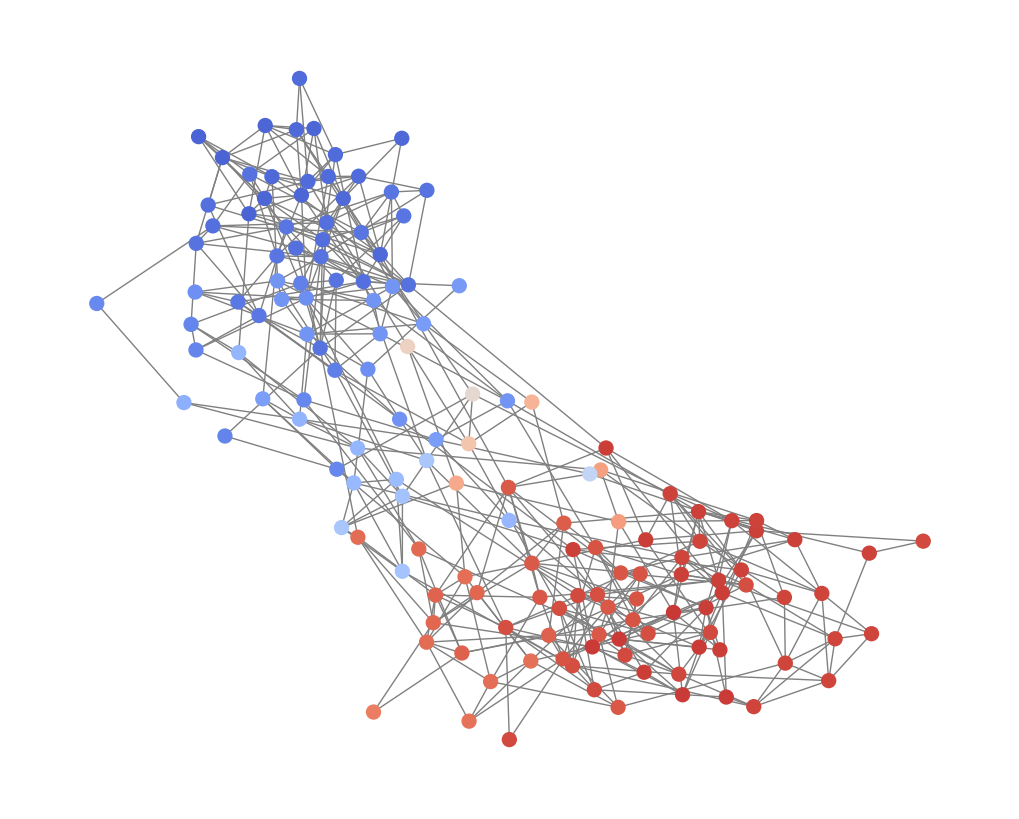

In [21]:
import matplotlib.pyplot as plt
import networkx as nx

time = 1

G = recorded_graphs[time][0]
opinions = recorded_graphs[time][1]

cmap = plt.cm.coolwarm  # Blue-White-Red colormap
norm = plt.Normalize(vmin=-10, vmax=10)  # Normalize opinions to the range [-10, 10]
colors = [cmap(norm(opinion)) for opinion in opinions]

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)  # Use a consistent layout for the graph
nx.draw(
    G,
    pos=pos,
    node_color=colors,
    with_labels=False,
    node_size=100,
    edge_color="gray",
)

# Number of Model Parameters

In [ ]:
from agents.dqn import GNN_REGISTRY, QNET_REGISTRY

embed_dim = 128
layers = 4
gnn_architectures = ["GraphSage", "GlobalMP", "GraphormerGD", "GCN"]
dqn_architectures = ["DP", "CE"]

for gnn in gnn_architectures:
    for dqn in dqn_architectures:
        model = GNN_REGISTRY[gnn](embed_dim=embed_dim, num_layers=layers)  # your model
        model_total = QNET_REGISTRY[dqn](model)  # your model

        # Total number of parameters
        total_params = sum(p.numel() for p in model_total.parameters())
        print(f"Total parameters {gnn}-{dqn}:", total_params)

        # Optional: total trainable parameters only
        trainable_params = sum(p.numel() for p in model_total.parameters() if p.requires_grad)
        print(f"Trainable parameters {gnn}-{dqn}:", trainable_params)


Total parameters GraphSage-DP: 149121
Trainable parameters GraphSage-DP: 149121
Total parameters GraphSage-CE: 214914
Trainable parameters GraphSage-CE: 214914
Total parameters GlobalMP-DP: 215041
Trainable parameters GlobalMP-DP: 215041
Total parameters GlobalMP-CE: 280834
Trainable parameters GlobalMP-CE: 280834
Total parameters GraphormerGD-DP: 413969
Trainable parameters GraphormerGD-DP: 413969
Total parameters GraphormerGD-CE: 479762
Trainable parameters GraphormerGD-CE: 479762
Total parameters GCN-DP: 83201
Trainable parameters GCN-DP: 83201
Total parameters GCN-CE: 148994
Trainable parameters GCN-CE: 148994


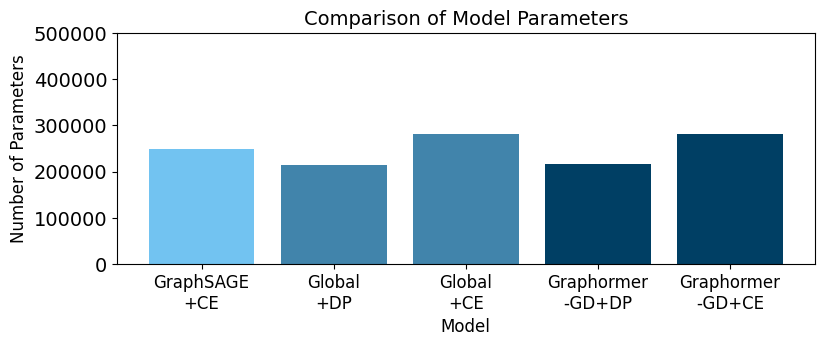

In [12]:
import matplotlib.pyplot as plt

# Data for the bar plot
parameter_names = ['GraphSAGE\n+CE', 'Global\n+DP', 'Global\n+CE', 'Graphormer\n-GD+DP', 'Graphormer\n-GD+CE']
parameter_values = [247810, 215041, 280834, 215561, 281354]
# Create the bar plot
plt.figure(figsize=(9, 3))
plt.bar(
    parameter_names,
    parameter_values,
    color=[
        "#72c3f1",   # Bar 1: distinct
        "#4184ab",     # Bar 2: Group A (light green)
        "#4184ab",     # Bar 3: Group A (darker green)
        "#003f64",     # Bar 4: Group B (light orange)
        '#003f64'      # Bar 5: Group B (darker orange)
    ]
)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Number of Parameters', fontsize=12)
plt.title('Comparison of Model Parameters', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.ylim(0, 500000)
plt.show()